# Figure 3: composite of the mean square slope
##### g.marechal (August 2025, Toulouse)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.ticker import ScalarFormatter

from matplotlib.patches import Ellipse
from scipy.ndimage import gaussian_filter
import time

import cmocean

In [6]:
pol = 'cyclonic' # polarization
path_data = '../data/' + pol +"/"
path_output = '../figures/'

### Load data

In [7]:
suffix = '.nc'

compo_mss_full_swell = xr.open_dataset(path_data + 'composite_mss_module_swell_full' + suffix)
compo_mss_full_windsea = xr.open_dataset(path_data + 'composite_mss_module_windsea_full' + suffix)
compo_mss_noow_swell = xr.open_dataset(path_data + 'composite_mss_module_swell_noow' + suffix)
compo_mss_noow_windsea = xr.open_dataset(path_data + 'composite_mss_module_windsea_noow' + suffix)

std_compo_mss_full_swell = xr.open_dataset(path_data + 'composite_std_mss_module_swell_full' + suffix)
std_compo_mss_full_windsea = xr.open_dataset(path_data + 'composite_std_mss_module_windsea_full' + suffix)
std_compo_mss_noow_swell = xr.open_dataset(path_data + 'composite_std_mss_module_swell_noow' + suffix)
std_compo_mss_noow_windsea = xr.open_dataset(path_data + 'composite_std_mss_module_windsea_noow' + suffix)


# --- Load the unique variable inside every datArray
# here: composite_swell and composite_windsea are just dummy variable name
compo_hs_full_swell = compo_mss_full_swell['composite_swell']
compo_hs_full_windsea = compo_mss_full_windsea['composite_windsea']
compo_hs_noow_swell = compo_mss_noow_swell['composite_swell']
compo_hs_noow_windsea = compo_mss_noow_windsea['composite_windsea']
std_compo_hs_full_swell = std_compo_mss_full_swell['composite_swell']
std_compo_hs_full_windsea = std_compo_mss_full_windsea['composite_windsea']
std_compo_hs_noow_swell = std_compo_mss_noow_swell['composite_swell']
std_compo_hs_noow_windsea = std_compo_mss_noow_windsea['composite_windsea']


In [8]:
# --- The number of independant eddies MSS run
# OWA
n_real_swell_OWA = 103
n_real_windsea_OWA = 40

# NOOW
n_real_swell_NOOW = 104
n_real_windsea_NOOW = 53

### Plot Circles

In [9]:
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

x_circle_small = np.cos(theta)/2.5
y_circle_small = np.sin(theta)/2.5


arrow_length = 0.8  # Adjust length as needed
x_start = 0
y_start = 0
theta_rot = 0
x_end = x_start + arrow_length * np.cos(theta_rot*(+1))
y_end = y_start + arrow_length * np.sin(theta_rot*(+1))

props1 = dict(boxstyle='round', facecolor='w', alpha=1)
props2 = dict(boxstyle='square', facecolor='w', alpha=1)

n_quiver = 15

/var/folders/bx/gz6w8d_533x2h1m1pq2pt88m0000gn/T/ipykernel_25437/323696229.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


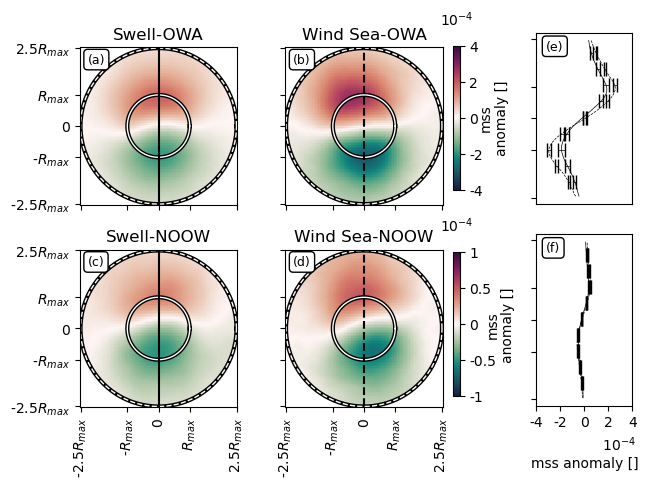

In [11]:
vmin0 = -0.0004
vmax0 = 0.0004

vmin0_2 = -0.0001
vmax0_2 = 0.0001

fig, axes = plt.subplots(ncols = 2, nrows = 2, sharex = True, sharey = True)
ax = axes[0][0]
p1 = ax.pcolormesh(compo_hs_full_swell.x, compo_hs_full_swell.y, compo_hs_full_swell, vmin = vmin0, vmax = vmax0, cmap = cmocean.cm.curl)
ax.plot(x_circle_small, y_circle_small, color = 'k', linewidth = 3)
ax.plot(x_circle_small, y_circle_small, color = 'w', linewidth = 1)
ax.plot(x_circle, y_circle, color = 'k', linewidth = 3)
ax.plot(x_circle, y_circle, color = 'w', linewidth = 1, linestyle = '--')
ax.set_xticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.set_yticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'])
ax.set_aspect('equal', 'box')
ax.plot([0, 0], [-1, 1], color = 'k')
ax.text(0.05, 0.9, '(a)',
     transform = ax.transAxes, bbox = props1, fontsize = 9)
ax.set_title('Swell-OWA')

ax = axes[0][1]
ax.pcolormesh(compo_hs_full_swell.x, compo_hs_full_swell.y, compo_hs_full_windsea, vmin = vmin0, vmax = vmax0, cmap = cmocean.cm.curl)
ax.plot(x_circle_small, y_circle_small, color = 'k', linewidth = 3)
ax.plot(x_circle_small, y_circle_small, color = 'w', linewidth = 1)
ax.plot(x_circle, y_circle, color = 'k', linewidth = 3)
ax.plot(x_circle, y_circle, color = 'w', linewidth = 1, linestyle = '--')
ax.set_xticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.set_yticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'])
ax.set_aspect('equal', 'box')

ax.plot([0, 0], [-1, 1], color = 'k', linestyle = '--')
ax.text(0.05, 0.9, '(b)',
     transform = ax.transAxes, bbox = props1, fontsize = 9)
ax.set_title('Wind Sea-OWA')

ax = axes[1][0]
ax.pcolormesh(compo_hs_full_swell.x, compo_hs_full_swell.y, compo_hs_noow_swell, vmin = vmin0_2, vmax = vmax0_2, cmap = cmocean.cm.curl)
ax.plot(x_circle_small, y_circle_small, color = 'k', linewidth = 3)
ax.plot(x_circle_small, y_circle_small, color = 'w', linewidth = 1)
ax.plot(x_circle, y_circle, color = 'k', linewidth = 3)
ax.plot(x_circle, y_circle, color = 'w', linewidth = 1, linestyle = '--')
ax.set_xticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.set_yticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'])
ax.set_aspect('equal', 'box')
ax.plot([0, 0], [-1, 1], color = 'k')
ax.text(0.05, 0.9, '(c)',
     transform = ax.transAxes, bbox = props1, fontsize = 9)
ax.set_title('Swell-NOOW')

ax = axes[1][1]
p2 = ax.pcolormesh(compo_hs_full_swell.x, compo_hs_full_swell.y, compo_hs_noow_windsea, vmin = vmin0_2, vmax = vmax0_2, cmap = cmocean.cm.curl)

ax.plot(x_circle_small, y_circle_small, color = 'k', linewidth = 3)
ax.plot(x_circle_small, y_circle_small, color = 'w', linewidth = 1)
ax.plot(x_circle, y_circle, color = 'k', linewidth = 3)
ax.plot(x_circle, y_circle, color = 'w', linewidth = 1, linestyle = '--')
ax.plot([0, 0], [-1, 1], color = 'k', linestyle = '--')

ax.set_xticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'], rotation = 90)
ax.set_yticks([-1, -.4, 0, .4, 1], ['-2.5$R_{max}$', '-$R_{max}$', '0', '$R_{max}$', '2.5$R_{max}$'])
ax.set_aspect('equal', 'box')
ax.set_title('Wind Sea-NOOW')
ax.text(0.05, 0.9, '(d)',
     transform = ax.transAxes, bbox = props1, fontsize = 9)

plt.subplots_adjust(wspace=-.8, hspace=0)

ax_inset = fig.add_axes([.93, .6, .15, .357])
ax_inset.plot(compo_hs_full_windsea[:, 50], compo_hs_noow_windsea.y, color = 'k', linestyle = '--', linewidth = 0.5)
ax_inset.plot(compo_hs_full_swell[:, 50], compo_hs_noow_windsea.y, color = 'k', linewidth = 0.5)

ax_inset.errorbar(compo_hs_full_windsea[::10,50], compo_hs_noow_windsea.y[::10], xerr=abs(std_compo_hs_full_swell[::10,50])/np.sqrt(n_real_swell_OWA), capsize = 5, fmt=' ', color = 'k', linewidth = 0.5)
ax_inset.errorbar(compo_hs_full_swell[::10,50], compo_hs_noow_windsea.y[::10], xerr=abs(std_compo_hs_full_windsea[::10,50])/np.sqrt(n_real_swell_OWA), capsize = 5, fmt=' ', color = 'k', linewidth = 0.5)


# ax_inset.set_yticks([])
# ax_inset.set_yticks([])  # Keeps the ticks, removes labels

ax_inset.set_yticks([-1, -.4, 0, .4, 1])
ax_inset.set_yticklabels([])  # Keeps the ticks, removes labels
ax_inset.set_xticks([])  # Keeps the ticks, removes labels

ax_inset.set_xlim([-0.0004, 0.0004])
ax_inset.text(0.1, 0.9, '(e)',
     transform = ax_inset.transAxes, bbox = props1, fontsize = 9)

ax_inset = fig.add_axes([.93, .18, .15, .357])
ax_inset.plot(compo_hs_noow_windsea[:, 50], compo_hs_noow_windsea.y, color = 'k', linestyle = '--', linewidth = 0.5)
ax_inset.plot(compo_hs_noow_swell[:, 50], compo_hs_noow_windsea.y, color = 'k', linewidth = 0.5)

ax_inset.errorbar(compo_hs_noow_windsea[::10,50], compo_hs_noow_windsea.y[::10], xerr=abs(std_compo_hs_noow_swell[::10,50])/np.sqrt(n_real_swell_NOOW), capsize = 5, fmt=' ', color = 'k', linewidth = 0.5)
ax_inset.errorbar(compo_hs_noow_swell[::10,50], compo_hs_noow_windsea.y[::10], xerr=abs(std_compo_hs_noow_windsea[::10,50])/np.sqrt(n_real_swell_NOOW), capsize = 5, fmt=' ', color = 'k', linewidth = 0.5)


ax_inset.set_yticks([-1, -.4, 0, .4, 1])
ax_inset.set_yticklabels([])  # Keeps the ticks, removes labels
ax_inset.set_xticks([])  # Keeps the ticks, removes labels

ax_inset.set_xlim([-0.0004, 0.0004])

ax_inset.set_xticks([-0.0004, -0.0002, 0, 0.0002, 0.0004])
ax_inset.set_xticklabels(['-4', '-2', '0', '2', '4'])
ax_inset.set_xlabel('                $10^{-4}$\nmss anomaly []')
ax_inset.text(0.1, 0.9, '(f)',
     transform = ax_inset.transAxes, bbox = props1, fontsize = 9)
cax_full = fig.add_axes([.8, .63, .01, 0.3])

cbar_1 = plt.colorbar(p1, cax = cax_full)
cbar_1.ax.set_title(r'$10^{-4}$', fontsize = 10, pad = 15)  # Optional: if you want manual label
cbar_1.ax.set_ylabel('mss\nanomaly []', labelpad = -3)  # Optional: if you want manual label

tick_vals = [-0.0004, -.0002, 0, .0002, .0004]
tick_labels = ['-4', '-2', '0', '2', '4']
cbar_1.set_ticks(tick_vals)
cbar_1.set_ticklabels(tick_labels)

cax_noow = fig.add_axes([.8, .2, .01, 0.3])

cbar_2 = plt.colorbar(p2, cax = cax_noow)
cbar_2.ax.set_title(r'$10^{-4}$', fontsize = 10, pad = 15)  # Optional: if you want manual label
tick_vals = [-0.0001, -.00005, 0, .00005, .0001]
tick_labels = ['-1', '-0.5', '0', '0.5', '1']
cbar_2.set_ticks(tick_vals)
cbar_2.set_ticklabels(tick_labels)
cbar_2.ax.set_ylabel('mss\nanomaly []', labelpad = -8)  # Optional: if you want manual label
plt.tight_layout()
plt.savefig(path_output + 'Fig3.png', dpi = 300, bbox_inches = 'tight')
